<a href="https://www.kaggle.com/code/abbasamjherawala/arma-model-for-nsei-stock-prediction?scriptVersionId=121372255" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# *Model:* ARMA
# *Stock Data:* NSEI
#  *Name: *Abbas Amjherawala**

In [1]:
!pip install yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from tqdm import tqdm
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta, timezone
from time import time

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 3.0 MB/s eta 0:00:00


# **Import Data and calculate Returns**
> **plots:** *prices of stocks over time and returns of stocks over time*

In [2]:
tickerSymbol = '^NSEI'
data = yf.Ticker(tickerSymbol)
data

yfinance.Ticker object <^NSEI>

In [3]:
prices = data.history(start='2022-03-03', end='2023-03-03').Close
prices

Date
2022-03-03 00:00:00+05:30    16498.050781
2022-03-04 00:00:00+05:30    16245.349609
2022-03-07 00:00:00+05:30    15863.150391
2022-03-08 00:00:00+05:30    16013.450195
2022-03-09 00:00:00+05:30    16345.349609
                                 ...     
2023-02-24 00:00:00+05:30    17465.800781
2023-02-27 00:00:00+05:30    17392.699219
2023-02-28 00:00:00+05:30    17303.949219
2023-03-01 00:00:00+05:30    17450.900391
2023-03-02 00:00:00+05:30    17321.900391
Name: Close, Length: 250, dtype: float64

In [4]:
returns = prices.pct_change().dropna()
returns

Date
2022-03-04 00:00:00+05:30   -0.015317
2022-03-07 00:00:00+05:30   -0.023527
2022-03-08 00:00:00+05:30    0.009475
2022-03-09 00:00:00+05:30    0.020726
2022-03-10 00:00:00+05:30    0.015267
                               ...   
2023-02-24 00:00:00+05:30   -0.002595
2023-02-27 00:00:00+05:30   -0.004185
2023-02-28 00:00:00+05:30   -0.005103
2023-03-01 00:00:00+05:30    0.008492
2023-03-02 00:00:00+05:30   -0.007392
Name: Close, Length: 249, dtype: float64

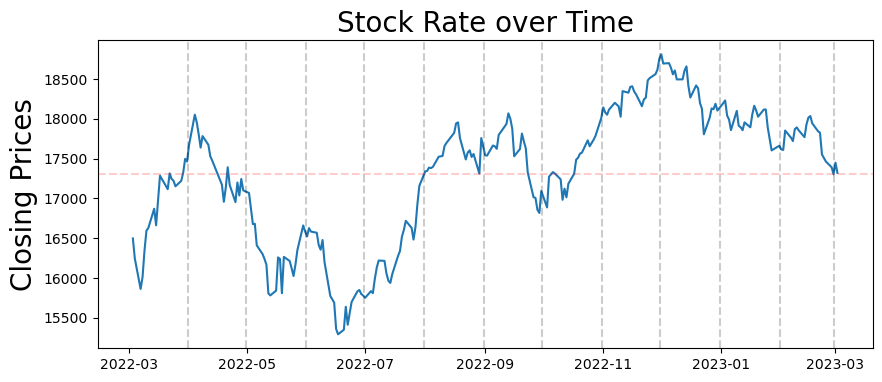

In [5]:
plt.figure(figsize=(10,4))
plt.plot(prices)
plt.ylabel('Closing Prices', fontsize=20)
plt.title('Stock Rate over Time', fontsize=20)

dates = pd.date_range(start='2022-03-03', end='2023-03-03', freq='M')
for date in dates:
    plt.axvline(date, color='k', linestyle='--', alpha=0.2)
plt.axhline(prices.mean(), color='r', alpha=0.2, linestyle='--')

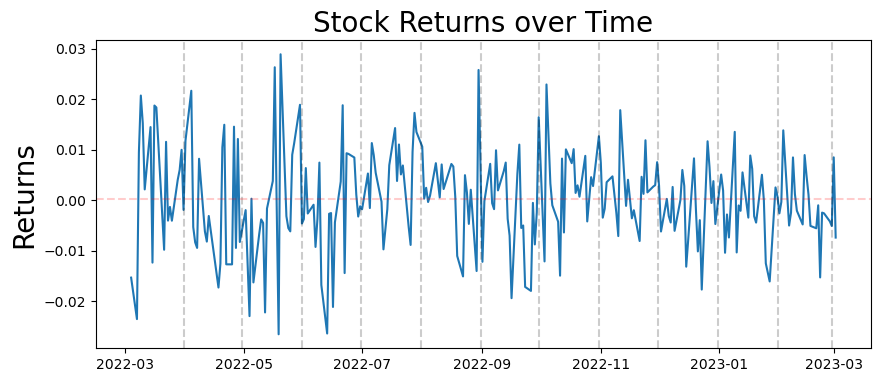

In [6]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Returns', fontsize=20)
plt.title('Stock Returns over Time', fontsize=20)

dates = pd.date_range(start='2022-03-03', end='2023-03-03', freq='M')
for date in dates:
    plt.axvline(date, color='k', linestyle='--', alpha=0.2)
plt.axhline(returns.mean(), color='r', alpha=0.2, linestyle='--')

# ACF for MA
> No proper identifications captured

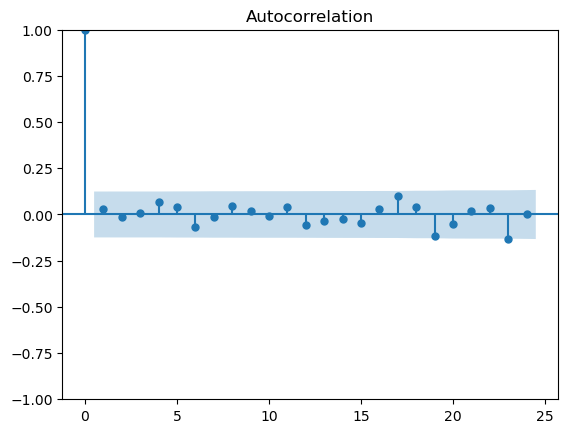

In [7]:
plot_acf(returns)
plt.show()

# PACF for AR
> No proper identification captured

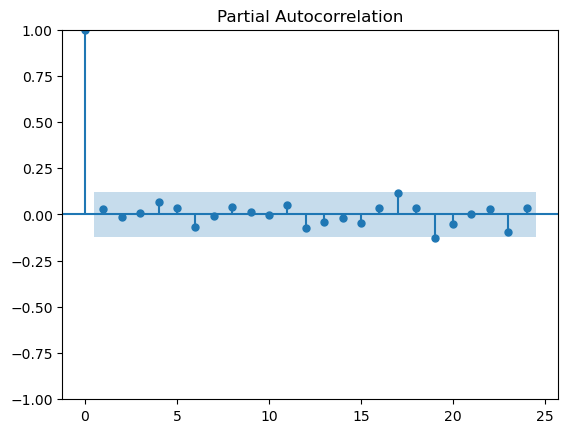

In [8]:
plot_pacf(returns, method='ywm')
plt.show()

# Train and Test data splits
1. divide price dataframe
2. train ARIMA model on train set
3. test order of ARIMA model among: (0,0,0), (4,0,4), (4,0,6) and (6,0,6)
4. predicting test data on ARIMA order (5,0,4), best
5. plotting original vs predicted data
6. calculating acuuracy: mae, mse, mape

In [9]:
p_train_date='2023-01-02'
p_train_data = prices[:p_train_date]
p_train_data.index = pd.to_datetime(p_train_data.index)
p_train_data

Date
2022-03-03 00:00:00+05:30    16498.050781
2022-03-04 00:00:00+05:30    16245.349609
2022-03-07 00:00:00+05:30    15863.150391
2022-03-08 00:00:00+05:30    16013.450195
2022-03-09 00:00:00+05:30    16345.349609
                                 ...     
2022-12-27 00:00:00+05:30    18132.300781
2022-12-28 00:00:00+05:30    18122.500000
2022-12-29 00:00:00+05:30    18191.000000
2022-12-30 00:00:00+05:30    18105.300781
2023-01-02 00:00:00+05:30    18197.449219
Name: Close, Length: 208, dtype: float64

In [10]:
p_test_date='2023-01-03'
p_test_data = prices[p_test_date :]
p_test_data.index = pd.to_datetime(p_test_data.index)
p_test_data

Date
2023-01-03 00:00:00+05:30    18232.550781
2023-01-04 00:00:00+05:30    18042.949219
2023-01-05 00:00:00+05:30    17992.150391
2023-01-06 00:00:00+05:30    17859.449219
2023-01-09 00:00:00+05:30    18101.199219
2023-01-10 00:00:00+05:30    17914.150391
2023-01-11 00:00:00+05:30    17895.699219
2023-01-12 00:00:00+05:30    17858.199219
2023-01-13 00:00:00+05:30    17956.599609
2023-01-16 00:00:00+05:30    17894.849609
2023-01-17 00:00:00+05:30    18053.300781
2023-01-18 00:00:00+05:30    18165.349609
2023-01-19 00:00:00+05:30    18107.849609
2023-01-20 00:00:00+05:30    18027.650391
2023-01-23 00:00:00+05:30    18118.550781
2023-01-24 00:00:00+05:30    18118.300781
2023-01-25 00:00:00+05:30    17891.949219
2023-01-27 00:00:00+05:30    17604.349609
2023-01-30 00:00:00+05:30    17648.949219
2023-01-31 00:00:00+05:30    17662.150391
2023-02-01 00:00:00+05:30    17616.300781
2023-02-02 00:00:00+05:30    17610.400391
2023-02-03 00:00:00+05:30    17854.050781
2023-02-06 00:00:00+05:30    

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
model = ARIMA(p_train_data, order=(0, 0, 0))
fitted = model.fit()

next_day_price = fitted.forecast()
predicted_price = next_day_price.values[0]
print("Predicted price for the 2023-01-03:", predicted_price)
print("Original price for the 2023-01-03:", p_test_data[0])
print("Difference between original and predicted price:", p_test_data[0] - predicted_price)

Predicted price for the 2023-01-03: 17204.45897981055
Original price for the 2023-01-03: 18232.55078125
Difference between original and predicted price: 1028.0918014394483


In [13]:
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  208
Model:                          ARIMA   Log Likelihood               -1705.504
Date:                Tue, 07 Mar 2023   AIC                           3415.007
Time:                        15:20:03   BIC                           3421.682
Sample:                             0   HQIC                          3417.706
                                - 208                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.72e+04     62.589    274.881      0.000    1.71e+04    1.73e+04
sigma2      7.758e+05   1.07e+05      7.263      0.000    5.66e+05    9.85e+05
Ljung-Box (L1) (Q):                 201.32   Jarque-

In [14]:
model = ARIMA(p_train_data, order=(4, 0, 4))
fitted = model.fit()

next_day_price = fitted.forecast()
predicted_price = next_day_price.values[0]
print("Predicted price for the 2023-01-03:", predicted_price)
print("Original price for the 2023-01-03:", p_test_data[0])
print("Difference between original and predicted price:", p_test_data[0] - predicted_price)

Predicted price for the 2023-01-03: 18192.11322150296
Original price for the 2023-01-03: 18232.55078125
Difference between original and predicted price: 40.437559747038904


In [15]:
model = ARIMA(p_train_data, order=(4, 0, 6))
fitted = model.fit()

next_day_price = fitted.forecast()
predicted_price = next_day_price.values[0]
print("Predicted price for the 2023-01-03:", predicted_price)
print("Original price for the 2023-01-03:", p_test_data[0])
print("Difference between original and predicted price:", p_test_data[0] - predicted_price)

Predicted price for the 2023-01-03: 18189.096132577906
Original price for the 2023-01-03: 18232.55078125
Difference between original and predicted price: 43.454648672093754


In [16]:
model = ARIMA(p_train_data, order=(6, 0, 6))
fitted = model.fit()

next_day_price = fitted.forecast()
predicted_price = next_day_price.values[0]
print("Predicted price for the 2023-01-03:", predicted_price)
print("Original price for the 2023-01-03:", p_test_data[0])
print("Difference between original and predicted price:", p_test_data[0] - predicted_price)

Predicted price for the 2023-01-03: 18184.791773403267
Original price for the 2023-01-03: 18232.55078125
Difference between original and predicted price: 47.75900784673286


In [17]:
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  208
Model:                 ARIMA(6, 0, 6)   Log Likelihood               -1360.545
Date:                Tue, 07 Mar 2023   AIC                           2749.090
Time:                        15:20:09   BIC                           2795.815
Sample:                             0   HQIC                          2767.983
                                - 208                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.72e+04    472.968     36.376      0.000    1.63e+04    1.81e+04
ar.L1          1.8043      0.230      7.834      0.000       1.353       2.256
ar.L2         -1.7101      0.253     -6.770      0.0

In [18]:
i=0
total_profit=0
total_loss=0
predictions=[]
for check in p_test_data:
    model = ARIMA(p_train_data, order=(5, 0, 4))
    fitted = model.fit()

    next_day_price = fitted.forecast()
    predicted_price = next_day_price.values[0]
    print(f"Predicted price for the {i+1} day:", predicted_price)
    predictions.append(predicted_price)
    print(f"Original price for the {i+1} day:", check)
    pr_ls= check - predicted_price
    if pr_ls<0:
        print("Loss of:", abs(pr_ls))
        total_loss+=pr_ls
    elif pr_ls==0:
        print("No Profit and No Loss")
    else:
        print("Profit of:", abs(pr_ls))
        total_profit+=pr_ls
    print("\n")
    p_train_data.loc[len(p_train_data)+i] = p_test_data.values[i]
    i=i+1

Predicted price for the 1 day: 18182.879521343188
Original price for the 1 day: 18232.55078125
Profit of: 49.67125990681234


Predicted price for the 2 day: 18206.68568765759
Original price for the 2 day: 18042.94921875
Loss of: 163.7364689075912


Predicted price for the 3 day: 18017.093685944226
Original price for the 3 day: 17992.150390625
Loss of: 24.94329531922631


Predicted price for the 4 day: 17984.23160279342
Original price for the 4 day: 17859.44921875
Loss of: 124.78238404342119


Predicted price for the 5 day: 17854.562915720642
Original price for the 5 day: 18101.19921875
Profit of: 246.6363030293578


Predicted price for the 6 day: 18089.831674463043
Original price for the 6 day: 17914.150390625
Loss of: 175.68128383804287


Predicted price for the 7 day: 17875.245935994215
Original price for the 7 day: 17895.69921875
Profit of: 20.45328275578504


Predicted price for the 8 day: 17890.21201381449
Original price for the 8 day: 17858.19921875
Loss of: 32.01279506448918


P

In [19]:
print("From January to March")
print("total profit of Rs.",total_profit)
print("Total loss of Rs.",total_loss)

From January to March
total profit of Rs. 1929.0283467814334
Total loss of Rs. -2239.494293546999


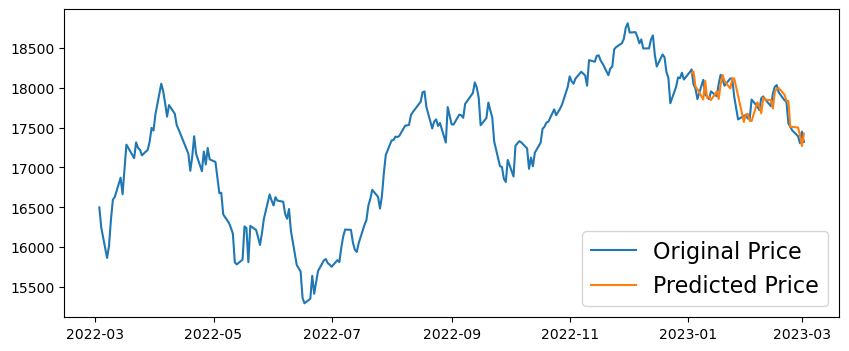

In [20]:
predict = pd.DataFrame(predictions, index=p_test_data.index)
plt.figure(figsize=(10,4))

plt.plot(prices)
plt.plot(predict)
plt.legend(('Original Price', 'Predicted Price'), fontsize=16)


In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [22]:
residuals = p_test_data - predictions
print("The accuracy of the ARIMA model for the test/train data is as stated as below:")
print('Mean Absolute Error:', mean_absolute_error(p_test_data, predictions))
print('Mean Squared Error:', mean_squared_error(p_test_data, predictions))
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(p_test_data, predictions))

The accuracy of the ARIMA model for the test/train data is as stated as below:
Mean Absolute Error: 99.25053905543886
Mean Squared Error: 16574.490334278504
Root Mean Squared Error: 128.7419525029759
Mean Absolute Percentage Error: 0.005570384508734555


# Predicting Stck Price for tomorrow (04-03-2023) using ARIMA

In [23]:
import datetime
end_date = datetime.date.today()
start_date = end_date - datetime.timedelta(days=365)
prices = data.history(start=start_date, end=end_date).Close
prices

Date
2022-03-07 00:00:00+05:30    15863.150391
2022-03-08 00:00:00+05:30    16013.450195
2022-03-09 00:00:00+05:30    16345.349609
2022-03-10 00:00:00+05:30    16594.900391
2022-03-11 00:00:00+05:30    16630.449219
                                 ...     
2023-02-28 00:00:00+05:30    17303.949219
2023-03-01 00:00:00+05:30    17450.900391
2023-03-02 00:00:00+05:30    17321.900391
2023-03-03 00:00:00+05:30    17594.349609
2023-03-06 00:00:00+05:30    17711.449219
Name: Close, Length: 250, dtype: float64

In [24]:
model = ARIMA(prices, order=(0, 0, 0))
fitted = model.fit()

next_day_price = fitted.forecast()
predicted_price = next_day_price.values[0]
print(f"Predicted price for the {end_date}, i.e. tomorrow:", predicted_price)

Predicted price for the 2023-03-07, i.e. tomorrow: 17319.169984230128


# Function to Analyse Stock for average and deviation returns
> User Inputs:
* Provide start date input of the form: dd-mm-yyyy 
* Provide end date input of the form: dd-mm-yyyy 
* Provide Retrun Period Weeks
* Provide Minimum Avg Return
* Provide Maximum Deviation Return
* Calculate future price of stock using ARIMA 5,0,4

In [25]:
from pandas_datareader.nasdaq_trader import get_nasdaq_symbols
from pandas_datareader._utils import RemoteDataError

In [26]:
def plot_stock_trend_and_returns(prices, titles, start_date, end_date, all_returns):
    
    plt.figure(figsize=(10,6))
    
    plt.subplot(2,1,1)
    plt.plot(prices)
    plt.title(titles[0], fontsize=16)
    plt.ylabel('Price (Rs.)', fontsize=14)
    
    plt.subplot(2,1,2)
    plt.plot(all_returns[0], all_returns[1], color='g')
    plt.title(titles[1], fontsize=16)
    plt.ylabel('Return (Rs.)', fontsize=14)
    plt.axhline(0, color='k', linestyle='--')
    
    plt.tight_layout()
    plt.show()

In [27]:
def perform_analysis_for_stock(prices, start_date, end_date, return_period_weeks, verbose=False):    
    pct_return_after_period = []
    buy_dates = []

    for buy_date, buy_price in prices.iteritems():
        sell_date = buy_date + timedelta(weeks=return_period_weeks)
        
        try:
            sell_price = prices[prices.index == sell_date].iloc[0]
        except IndexError:
            continue
        
        pct_return = (sell_price - buy_price)/buy_price
        if pct_return>0:
            pct_return_after_period.append(pct_return)
            buy_dates.append(buy_date)
        
            if verbose:
                print('Date Buy: %s, Price Buy: %s'%(buy_date,round(buy_price,2)))
                print('Date Sell: %s, Price Sell: %s'%(sell_date,round(sell_price,2)))
                print('Return: %s%%'%round(pct_return*100,1))
                print('-------------------')
    
    if len(pct_return_after_period) == 0:
        return -np.inf, np.inf, None
    
    return np.mean(pct_return_after_period), np.std(pct_return_after_period), [buy_dates, pct_return_after_period]

In [28]:
from datetime import datetime

input_str=input("Provide start date input of the form: dd-mm-yyyy")
input_s_dt = datetime.strptime(input_str, '%d-%m-%Y')
input_str=input("Provide end date input of the form: dd-mm-yyyy")
input_e_dt = datetime.strptime(input_str, '%d-%m-%Y')
start_date, end_date = datetime(input_s_dt.year, input_s_dt.month, input_s_dt.day), datetime(input_e_dt.year, input_e_dt.month, input_e_dt.day)
return_period_weeks = int(input("Provide Retrun Period Weeks:"))
min_avg_return  = float(input("Provide Minimum Avg Return:"))
max_dev_return = float(input("Provide Maximum Deviation Return:"))

now = datetime.now()
if end_date > now:
    prices = data.history(start=start_date, end=now).Close
else: prices = data.history(start=start_date, end=end_date).Close
prices

Provide start date input of the form: dd-mm-yyyy 02-02-2022
Provide end date input of the form: dd-mm-yyyy 02-04-2023
Provide Retrun Period Weeks: 16
Provide Minimum Avg Return: 0.009
Provide Maximum Deviation Return: 0.9


Date
2022-02-02 00:00:00+05:30    17780.000000
2022-02-03 00:00:00+05:30    17560.199219
2022-02-04 00:00:00+05:30    17516.300781
2022-02-07 00:00:00+05:30    17213.599609
2022-02-08 00:00:00+05:30    17266.750000
                                 ...     
2023-02-28 00:00:00+05:30    17303.949219
2023-03-01 00:00:00+05:30    17450.900391
2023-03-02 00:00:00+05:30    17321.900391
2023-03-03 00:00:00+05:30    17594.349609
2023-03-06 00:00:00+05:30    17711.449219
Name: Close, Length: 272, dtype: float64

In [29]:
import datetime
tz = 'Asia/Kolkata'
while now < end_date:
    model = ARIMA(prices, order=(5, 0, 4))
    fitted = model.fit()
    next_day_price = fitted.forecast()
    predicted_price = next_day_price.values[0]
    ts = pd.Timestamp(now).tz_localize('UTC').tz_convert(tz)
    new_data = pd.Series([predicted_price], index=[ts])
    prices = pd.concat([prices, new_data])
    now = now + datetime.timedelta(days=1)

Date Buy: 2022-04-18 00:00:00+05:30, Price Buy: 17173.65
Date Sell: 2022-08-08 00:00:00+05:30, Price Sell: 17525.1
Return: 2.0%
-------------------
Date Buy: 2022-04-20 00:00:00+05:30, Price Buy: 17136.55
Date Sell: 2022-08-10 00:00:00+05:30, Price Sell: 17534.75
Return: 2.3%
-------------------
Date Buy: 2022-04-21 00:00:00+05:30, Price Buy: 17392.6
Date Sell: 2022-08-11 00:00:00+05:30, Price Sell: 17659.0
Return: 1.5%
-------------------
Date Buy: 2022-04-22 00:00:00+05:30, Price Buy: 17171.95
Date Sell: 2022-08-12 00:00:00+05:30, Price Sell: 17698.15
Return: 3.1%
-------------------
Date Buy: 2022-04-26 00:00:00+05:30, Price Buy: 17200.8
Date Sell: 2022-08-16 00:00:00+05:30, Price Sell: 17825.25
Return: 3.6%
-------------------
Date Buy: 2022-04-27 00:00:00+05:30, Price Buy: 17038.4
Date Sell: 2022-08-17 00:00:00+05:30, Price Sell: 17944.25
Return: 5.3%
-------------------
Date Buy: 2022-04-28 00:00:00+05:30, Price Buy: 17245.05
Date Sell: 2022-08-18 00:00:00+05:30, Price Sell: 1795

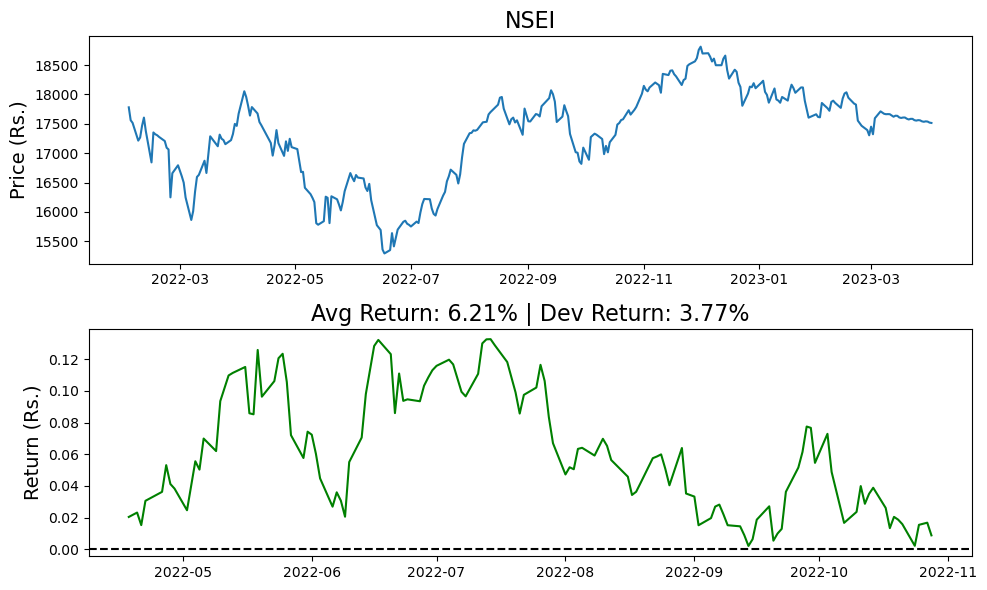

The Avg Return and Dev Return were High!


In [30]:
avg_return, dev_return, all_returns = perform_analysis_for_stock(prices, start_date, end_date, return_period_weeks,True)
title_price = 'NSEI'
title_return = 'Avg Return: %s%% | Dev Return: %s%%'%(round(100*avg_return,2), round(100*dev_return,2))
plot_stock_trend_and_returns(prices, [title_price, title_return], start_date, end_date, all_returns)
if avg_return > min_avg_return and dev_return < max_dev_return:
    print("The Avg Return and Dev Return were High!")
else:
    print("The Avg Return and Dev Return were too Low!")

# Function to simulate user amount and give return *based on user inputs*

In [31]:
def run_simulation(returns, prices, amt, thresh, order=(5,0,1), verbose=True, plot=True):
    curr_holding = False
    events_list = []
    init_amt = amt
    #go through dates
    for date, r in tqdm (returns.iloc[14:].items(), total=len(returns.iloc[14:])):
        #if you're currently holding the stock, sell it
        if curr_holding:
            sell_price = prices.loc[date]
            curr_holding=False
            ret = (sell_price-buy_price)/buy_price
            amt *= (1+ret)
            events_list.append(('s', date, ret))
            
            if verbose:
                print('Sold at $%s'%sell_price)
                print('Predicted Return: %s'%round(pred,4))
                print('Actual Return: %s'%(round(ret, 4)))
                print('=======================================')
            continue

        #get data til just before current date
        curr_data = returns[:date]
        model = ARIMA(curr_data, order=order).fit()
        pred = model.forecast().values[0]

        #if you predict a high enough return and not holding, buy stock
        if (not curr_holding) and pred > thresh:
            curr_holding = True
            buy_price = prices.loc[date]
            events_list.append(('b', date))
            if verbose:
                print('Bought at $%s'%buy_price)
                
    if verbose:
        print('Total Amount: $%s'%round(amt,2))
        
    #graph
    if plot:
        plt.figure(figsize=(10,4))
        plt.plot(prices[14:])

        y_lims = (int(prices.min()*.95), int(prices.max()*1.05))
        shaded_y_lims = int(prices.min()*.5), int(prices.max()*1.5)

        for idx, event in enumerate(events_list):
            plt.axvline(event[1], color='k', linestyle='--', alpha=0.4)
            if event[0] == 's':
                color = 'green' if event[2] > 0 else 'red'
                plt.fill_betweenx(range(*shaded_y_lims), 
                                  event[1], events_list[idx-1][1], color=color, alpha=0.1)

        tot_return = round(100*(amt / init_amt - 1), 2)
        tot_return = str(tot_return) + '%'
        plt.title("%s Price Data\nThresh=%s\nTotal Amt: $%s\nTotal Return: %s"%(tickerSymbol, thresh, round(amt,2), tot_return), fontsize=20)
        plt.ylim(*y_lims)
        plt.show()
    
    return amt

Provide start date input of the form: dd-mm-yyyy 03-02-2023
Provide end date input of the form: dd-mm-yyyy 04-03-2023
Provide Amount: 100
Provide Threshold: 0.007


100%|██████████| 6/6 [00:02<00:00,  2.37it/s]


Total Amount: $100.0


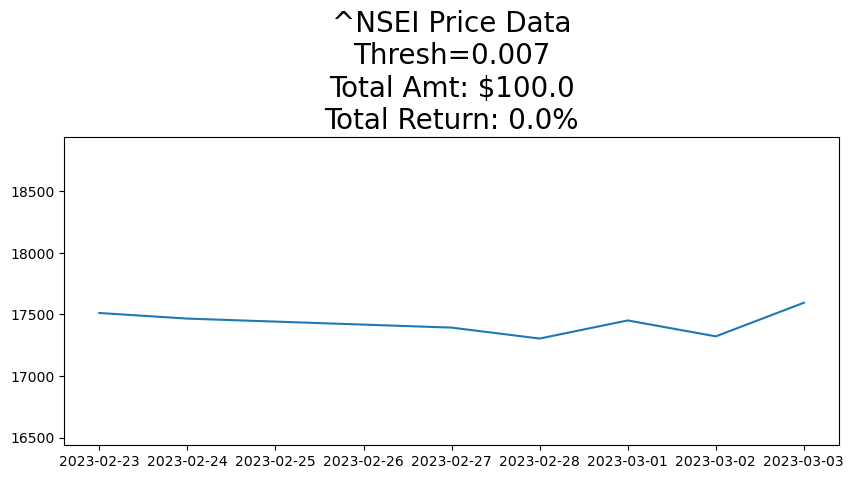

100.0

In [32]:
from datetime import datetime
input_str=input("Provide start date input of the form: dd-mm-yyyy")
input_s_dt = datetime.strptime(input_str, '%d-%m-%Y')
input_str=input("Provide end date input of the form: dd-mm-yyyy")
input_e_dt = datetime.strptime(input_str, '%d-%m-%Y')
start_date, end_date = datetime(input_s_dt.year, input_s_dt.month, input_s_dt.day), datetime(input_e_dt.year, input_e_dt.month, input_e_dt.day)
prices = data.history(start=start_date, end=end_date).Close

input_amt=float(input("Provide Amount:"))
input_th=float(input("Provide Threshold:"))
returns = prices.pct_change().dropna()
run_simulation(returns, prices, input_amt, input_th)

# Storing Investment data in CSV file

In [33]:
import datetime
from datetime import timedelta, timezone
end_date = datetime.date.today() - datetime.timedelta(days=1)
start_date = end_date - datetime.timedelta(days=365)
open_prices = data.history(start=start_date, end=end_date).Open
close_prices = data.history(start=start_date, end=end_date).Close

In [34]:
model = ARIMA(open_prices, order=(5, 0, 4))
fitted = model.fit()

next_day_price = fitted.forecast()
predicted_open_price = next_day_price.values[0]

model = ARIMA(close_prices, order=(5, 0, 4))
fitted = model.fit()

next_day_price = fitted.forecast()
predicted_close_price = next_day_price.values[0]

In [35]:
end_date = datetime.date.today()
start_date = end_date - datetime.timedelta(days=365)
open_prices = data.history(start=start_date, end=end_date).Open
close_prices = data.history(start=start_date, end=end_date).Close

dev_open=open_prices[-1]-predicted_open_price
dev_close=close_prices[-1]-predicted_close_price

In [36]:
from datetime import datetime, timedelta
import datetime as _dt
import pandas as pd

total_days = int(input("Provide total number of days to hold stock: "))
input_dt = input("Provide date input of the form: dd-mm-yyyy ")
input__dt = datetime.strptime(input_dt, '%d-%m-%Y')
start_date = datetime(input__dt.year, input__dt.month, input__dt.day)

def next_weekday(date):
    while date.weekday() >= 5: # if weekday is Sat or Sun
        date += timedelta(days=1)
    return date

start_date= next_weekday(start_date)
end_date = next_weekday(start_date + timedelta(days=total_days+1))

input_amt = float(input("Provide Amount to Invest: "))
input_th = float(input("Provide Minimum Return: "))
if total_days==1:
    date_range = pd.date_range(start=start_date, end=start_date, freq='B')
    dates = pd.Series(date_range)
else:
    date_range = pd.date_range(start=start_date, end=end_date, freq='B')
    dates = pd.Series(date_range)
dates

Provide total number of days to hold stock:  7
Provide date input of the form: dd-mm-yyyy  07-03-2023
Provide Amount to Invest:  100
Provide Minimum Return:  0.9


0   2023-03-07
1   2023-03-08
2   2023-03-09
3   2023-03-10
4   2023-03-13
5   2023-03-14
6   2023-03-15
dtype: datetime64[ns]

In [37]:
import datetime
from datetime import datetime as _dt
tz = 'Asia/Kolkata'
data_=[]
now = _dt.now()

for i in range(len(dates)):
    
    model = ARIMA(open_prices, order=(5, 0, 4))
    fitted = model.fit()
    next_day_price = fitted.forecast()
    predicted_open_price = next_day_price.values[0]
    ts = pd.Timestamp(now).tz_localize('UTC').tz_convert(tz)
    new_data = pd.Series([predicted_open_price], index=[ts])
    open_prices = pd.concat([open_prices, new_data])
    
    model = ARIMA(close_prices, order=(5, 0, 4))
    fitted = model.fit()
    next_day_price = fitted.forecast()
    predicted_close_price = next_day_price.values[0]
    ts = pd.Timestamp(now).tz_localize('UTC').tz_convert(tz)
    new_data = pd.Series([predicted_close_price], index=[ts])
    close_prices = pd.concat([close_prices, new_data])
    
    if total_days==1:
        sell_price=(predicted_close_price-predicted_open_price)/predicted_close_price*100*input_amt+input_amt
        data_.append({'Date': dates[i].strftime('%Y-%m-%d'),'Day': dates[i].strftime('%A'), 'Open': predicted_open_price, 'Close': predicted_close_price,'Return' : predicted_close_price-predicted_open_price, 'Amount': input_amt ,'Selling Price': sell_price , 'Profit(+)/Loss(-)': sell_price-input_amt})
    else:
        if i==0:
            data_.append({'Date': dates[i].strftime('%Y-%m-%d'),'Day': dates[i].strftime('%A'), 'Open': predicted_open_price, 'Close': predicted_close_price,'Return' : predicted_close_price-predicted_open_price, 'Amount': input_amt ,'Selling Price': 'None' , 'Profit(+)/Loss(-)': 'None'})
        elif i==total_days-1:
            sell_price=(predicted_close_price-data_[0]['Close'])/predicted_close_price*100*input_amt+input_amt
            data_.append({'Date': dates[i].strftime('%Y-%m-%d'),'Day': dates[i].strftime('%A'), 'Open': predicted_open_price, 'Close': predicted_close_price,'Return' : predicted_close_price-predicted_open_price, 'Amount': 'None' ,'Selling Price': sell_price , 'Profit(+)/Loss(-)': sell_price-input_amt})
        else:
            data_.append({'Date': dates[i].strftime('%Y-%m-%d'),'Day': dates[i].strftime('%A'), 'Open': predicted_open_price, 'Close': predicted_close_price,'Return' : predicted_close_price-predicted_open_price, 'Amount': 'None' ,'Selling Price': 'None' , 'Profit(+)/Loss(-)': 'None'})

In [38]:
import csv
import os

# Define column headers
headers = ['Date', 'Day', 'Open', 'Close', 'Return', 'Amount', 'Selling Price', 'Profit(+)/Loss(-)']

if os.path.exists('/kaggle/working/nsei_stock.csv'):
    with open(filename, mode='a', newline='') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=headers)
        for row in data_:
            writer.writerow(row)
else:
# Write data to CSV file
    with open('nsei_stock.csv', mode='w', newline='') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=headers)
        writer.writeheader()
        for row in data_:
            writer.writerow(row)

data_

[{'Date': '2023-03-07',
  'Day': 'Tuesday',
  'Open': 17626.196876108592,
  'Close': 17685.79982610626,
  'Return': 59.602949997668475,
  'Amount': 100.0,
  'Selling Price': 'None',
  'Profit(+)/Loss(-)': 'None'},
 {'Date': '2023-03-08',
  'Day': 'Wednesday',
  'Open': 17640.791260538546,
  'Close': 17651.53289703653,
  'Return': 10.741636497983563,
  'Amount': 'None',
  'Selling Price': 'None',
  'Profit(+)/Loss(-)': 'None'},
 {'Date': '2023-03-09',
  'Day': 'Thursday',
  'Open': 17659.43379813516,
  'Close': 17651.637866704914,
  'Return': -7.795931430246128,
  'Amount': 'None',
  'Selling Price': 'None',
  'Profit(+)/Loss(-)': 'None'},
 {'Date': '2023-03-10',
  'Day': 'Friday',
  'Open': 17685.346014852083,
  'Close': 17661.58408606325,
  'Return': -23.761928788833757,
  'Amount': 'None',
  'Selling Price': 'None',
  'Profit(+)/Loss(-)': 'None'},
 {'Date': '2023-03-13',
  'Day': 'Monday',
  'Open': 17662.33490630722,
  'Close': 17650.71152119445,
  'Return': -11.623385112769029,
  '

# New Data Import

In [34]:
import datetime
from datetime import timedelta, timezone

df = pd.read_csv('/kaggle/input/nsei-prev-data/in_nsei_daily.csv')
filtered_df = df.loc[df['minute'] < '2021-01-01 09:15:00+05:30']
close_prices = filtered_df['close']
test_close_prices = df['close']
test_date_range = pd.date_range(start='2020-12-31', end='2022-12-29', freq='B')
dates = pd.Series(test_date_range)
test_close_prices

0        8178.70
1        8188.60
2        8196.55
3        8269.90
4        8247.85
          ...   
1473    18010.30
1474    18136.00
1475    18109.25
1476    18207.10
1477    18117.05
Name: close, Length: 1478, dtype: float64

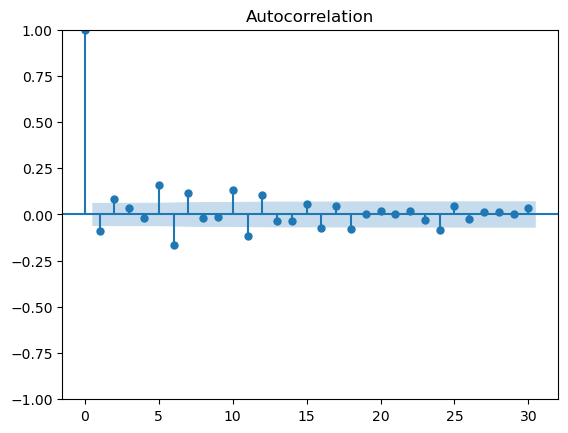

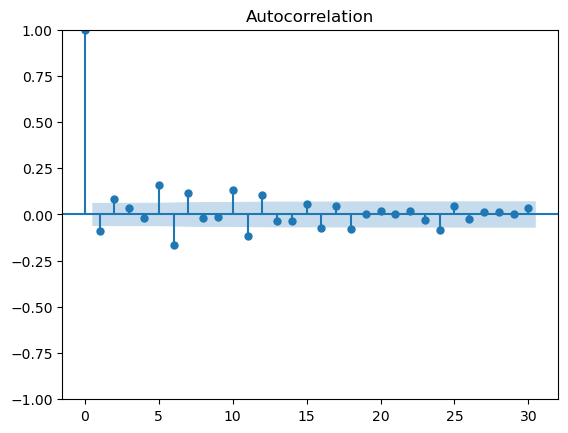

In [35]:
returns = close_prices.pct_change().dropna()
plot_acf(returns)

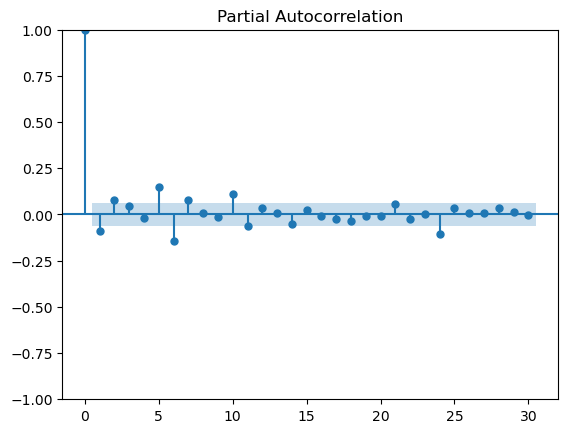

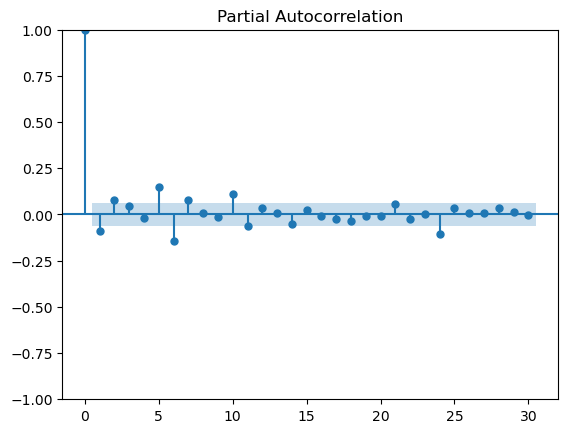

In [36]:
plot_pacf(returns, method='ywm')

In [37]:
model = ARIMA(close_prices, order=(5, 0, 5))
fitted = model.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  987
Model:                 ARIMA(5, 0, 5)   Log Likelihood               -6090.576
Date:                Tue, 07 Mar 2023   AIC                          12205.151
Time:                        19:26:50   BIC                          12263.887
Sample:                             0   HQIC                         12227.489
                                - 987                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.073e+04   1592.371      6.739      0.000    7610.356    1.39e+04
ar.L1          0.3442      0.059      5.794      0.000       0.228       0.461
ar.L2          0.2847      0.060      4.768      0.0

In [38]:
import datetime
from datetime import datetime as _dt
tz = 'Asia/Kolkata'
data_=[]
now = _dt.now()
try:
    # Your code here
    for i in range(len(dates)):

        model = ARIMA(close_prices, order=(5, 0, 5))
        fitted = model.fit()
        next_day_price = fitted.forecast()
        predicted_price = next_day_price.values[0]
        close_prices.loc[len(close_prices)] = test_close_prices.loc[len(close_prices)]
        
        if predicted_price<close_prices.loc[len(close_prices)-2]:
            direction='SELL'
            data_.append({'Date': dates[i].strftime('%Y-%m-%d'),'Day': dates[i].strftime('%A'), 'Current Close Price': close_prices.loc[len(close_prices)-2],'Next Day Price': test_close_prices.loc[len(close_prices)-1],'Predicted Direction' : direction,'Predicted Value': predicted_price, 'Pnl':close_prices.loc[len(close_prices)-1]-close_prices.loc[len(close_prices)-2]})
        else:
            direction='BUY'
            data_.append({'Date': dates[i].strftime('%Y-%m-%d'),'Day': dates[i].strftime('%A'), 'Current Close Price': close_prices.loc[len(close_prices)-2],'Next Day Price': test_close_prices.loc[len(close_prices)-1],'Predicted Direction' : direction,'Predicted Value': predicted_price, 'Pnl':close_prices.loc[len(close_prices)-1]-close_prices.loc[len(close_prices)-2]})

except KeyboardInterrupt or ValueError:
    # Code to handle the KeyboardInterrupt here
    print("Output is Stored in csv file: NSEI_STOCK.CSV!")

Output is Stored in csv file: NSEI_STOCK.CSV!


In [39]:
import csv
import os

# Define column headers
headers = ['Date', 'Day', 'Current Close Price', 'Next Day Price','Predicted Direction', 'Predicted Value','Pnl']

if not(os.path.exists('/kaggle/working/nsei_stock.csv')):
    with open('nsei_stock.csv', mode='a', newline='') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=headers)
        for row in data_:
            writer.writerow(row)
else:
# Write data to CSV file
    with open('nsei_stock.csv', mode='w', newline='') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=headers)
        writer.writeheader()
        for row in data_:
            writer.writerow(row)

data_

[{'Date': '2020-12-31',
  'Day': 'Thursday',
  'Current Close Price': 13967.2,
  'Next Day Price': 14015.1,
  'Predicted Direction': 'SELL',
  'Predicted Value': 13965.973778245747,
  'Pnl': 47.899999999999636},
 {'Date': '2021-01-01',
  'Day': 'Friday',
  'Current Close Price': 14015.1,
  'Next Day Price': 14144.5,
  'Predicted Direction': 'SELL',
  'Predicted Value': 14003.008137066157,
  'Pnl': 129.39999999999964},
 {'Date': '2021-01-04',
  'Day': 'Monday',
  'Current Close Price': 14144.5,
  'Next Day Price': 14196.35,
  'Predicted Direction': 'SELL',
  'Predicted Value': 14082.4759357218,
  'Pnl': 51.850000000000364},
 {'Date': '2021-01-05',
  'Day': 'Tuesday',
  'Current Close Price': 14196.35,
  'Next Day Price': 14132.8,
  'Predicted Direction': 'BUY',
  'Predicted Value': 14233.212827540907,
  'Pnl': -63.55000000000109},
 {'Date': '2021-01-06',
  'Day': 'Wednesday',
  'Current Close Price': 14132.8,
  'Next Day Price': 14148.5,
  'Predicted Direction': 'BUY',
  'Predicted Valu